In [1]:
# SPDX-FileCopyrightText: 2022 Aleksander Grochowicz
#
# SPDX-License-Identifier: GPL-3.0-or-later
import copy
from itertools import product

import scipy as sp
import numpy as np
import pandas as pd

import atlite
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import mpl_toolkits.mplot3d as a3
mpl.rcParams['figure.dpi'] = 150
import seaborn as sns



In [2]:
# Use the pgf backend for pdf exports (allows us to use xelatex).
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)

# Set up font.
plt.rcParams.update({
    "axes.formatter.limits": [-3,3], # Use scientific notation for large numbers.
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.texsystem": "lualatex",
    "pgf.preamble": "\n".join([
         r"\usepackage{unicode-math}",
         r"\setmainfont{TeX Gyre Termes}",
         r"\setmathfont{TeX Gyre Termes Math}",
    ])
})

cm = 1/2.54  # centimetres in inches

In [3]:
norway = gpd.read_file('data/shapefiles/marketzones_4326.geojson')
norway = norway.set_index('ElSpotOmr')


In [4]:
norway

,OBJECTID,Shape_Leng,Shape_Area,geometry
ElSpotOmr,,,,
NO 1,1,1.564837e+06,6.142908e+10,"MULTIPOLYGON (((10.92892 62.69609, 10.92947 62..."
NO 4,4,3.254895e+06,2.030709e+11,"MULTIPOLYGON (((28.33596 71.29423, 28.36301 71..."
NO 2,2,1.244447e+06,7.019396e+10,"MULTIPOLYGON (((5.74061 60.35170, 5.74081 60.3..."
NO 3,3,1.839255e+06,1.048593e+11,"MULTIPOLYGON (((10.66344 65.21288, 10.76747 65..."
NO 5,5,1.050565e+06,3.055399e+10,"MULTIPOLYGON (((7.41084 61.89793, 7.47890 61.7..."


In [5]:
norway["Region"] = ["NO-S", "NO-N", "NO-S", "NO-N", "NO-S"]

/tmp/ipykernel_1577787/2043971365.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
/tmp/ipykernel_1577787/2043971365.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);


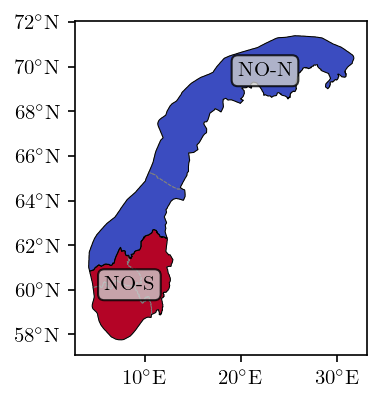

In [6]:
fig, ax = plt.subplots(figsize=(7.5*cm, 7.5*cm))
norway.dissolve(by="Region").plot(cmap="coolwarm", ax=ax)
norway.plot(ax=ax, color="none", edgecolor="grey", linewidth=0.45, ls="dashed")
norway.dissolve(by="Region").plot(color="none", edgecolor="black", linewidth=0.5, ax=ax)
ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);
ax.annotate("NO-S", xy=(0.185, 0.21), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");
ax.annotate("NO-N", xy=(0.65, 0.85), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");

fig.savefig("figures/paper_plots/map.pdf", bbox_inches="tight")

/tmp/ipykernel_1577787/3986843482.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
/tmp/ipykernel_1577787/3986843482.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);


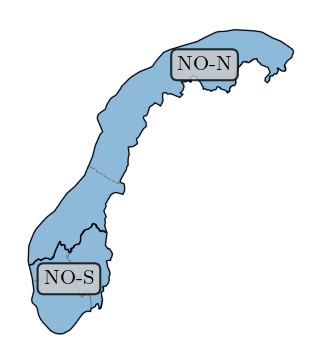

In [7]:
fig, ax = plt.subplots(figsize=(7.5*cm, 7.5*cm))
norway.dissolve(by="Region").plot(edgecolor="#5c8bc4", ax=ax, alpha=0.5)
norway.plot(ax=ax, color="none", edgecolor="grey", linewidth=0.45, ls="dashed")
norway.dissolve(by="Region").plot(color="none", edgecolor="black", linewidth=0.5, ax=ax)
ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);
ax.annotate("NO-S", xy=(0.185, 0.21), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");
ax.annotate("NO-N", xy=(0.65, 0.85), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");
ax.set_axis_off();

fig.savefig("figures/paper_plots/map_scen.png", bbox_inches="tight", transparent=True)

/tmp/ipykernel_1577787/2219719535.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
/tmp/ipykernel_1577787/2219719535.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);


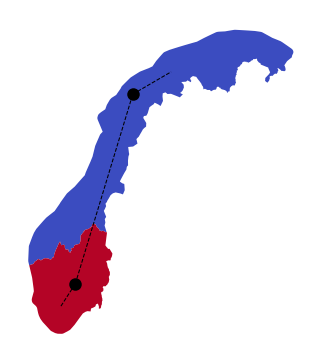

In [8]:
fig, ax = plt.subplots(figsize=(7.5*cm, 7.5*cm))
norway.dissolve(by="Region").plot(cmap="coolwarm", ax=ax)
#norway.plot(ax=ax, color="none", edgecolor="grey", linewidth=0.45, ls="dashed")
#norway.dissolve(by="Region").plot(color="none", edgecolor="black", linewidth=0.5, ax=ax)
ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);
# ax.annotate("NO-S", xy=(0.185, 0.13), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");
# ax.annotate("NO-N", xy=(0.65, 0.85), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");

# Remove ticks and borders.
ax.set_axis_off()


# Add nodes to map, one for each region.

ax.plot(9, 60, marker="o", color="black", markersize=5, zorder=10)
ax.plot(15, 68.5, marker="o", color="black", markersize=5, zorder=10)
fig.savefig("figures/paper_plots/map_no_flex.png", bbox_inches="tight", transparent=True)
# Connect nodes with lines.
ax.plot([9, 15], [60, 68.5], color="black", linewidth=0.5, zorder=10, ls = "dashed")

fig.savefig("figures/paper_plots/map_trans.png", bbox_inches="tight", transparent=True)

# Connect nodes with lines outside.
# NO-N
ax.plot([15, 19], [68.5,69.5], color="black", linewidth=0.5, zorder=10, ls = "dashed")
# NO-S
ax.plot([7.5, 9], [59,60], color="black", linewidth=0.5, zorder=10, ls = "dashed")
fig.savefig("figures/paper_plots/map_full-flex.png", bbox_inches="tight", transparent=True)


#fig.savefig("figures/map.pdf", bbox_inches="tight")

/tmp/ipykernel_1577787/2639342020.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
/tmp/ipykernel_1577787/2639342020.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);


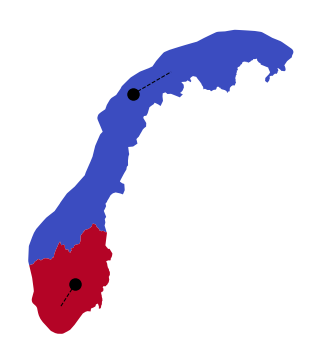

In [9]:
fig, ax = plt.subplots(figsize=(7.5*cm, 7.5*cm))
norway.dissolve(by="Region").plot(cmap="coolwarm", ax=ax)
#norway.plot(ax=ax, color="none", edgecolor="grey", linewidth=0.45, ls="dashed")
#norway.dissolve(by="Region").plot(color="none", edgecolor="black", linewidth=0.5, ax=ax)
ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);
# ax.annotate("NO-S", xy=(0.185, 0.13), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");
# ax.annotate("NO-N", xy=(0.65, 0.85), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");

ax.set_axis_off()

# Add nodes to map, one for each region.

ax.plot(9, 60, marker="o", color="black", markersize=5, zorder=10)
ax.plot(15, 68.5, marker="o", color="black", markersize=5, zorder=10)
# Connect nodes with lines outside.
# NO-N
ax.plot([15, 19], [68.5,69.5], color="black", linewidth=0.5, zorder=10, ls = "dashed")
# NO-S
ax.plot([7.5, 9], [59,60], color="black", linewidth=0.5, zorder=10, ls = "dashed")
plt.savefig("figures/paper_plots/map_stor.png", bbox_inches="tight", transparent=True)


#fig.savefig("figures/map.pdf", bbox_inches="tight")

/tmp/ipykernel_1577787/1369025998.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
/tmp/ipykernel_1577787/1369025998.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);


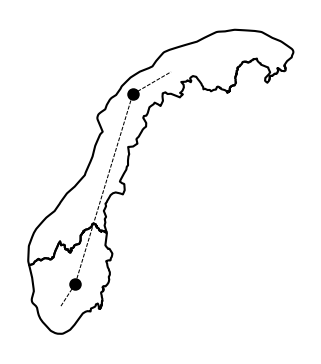

In [10]:
fig, ax = plt.subplots(figsize=(7.5*cm, 7.5*cm))
norway.dissolve(by="Region").plot(facecolor="none", ax=ax)
#norway.plot(ax=ax, color="none", edgecolor="grey", linewidth=0.45, ls="dashed")
#norway.dissolve(by="Region").plot(color="none", edgecolor="black", linewidth=0.5, ax=ax)
ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);
# ax.annotate("NO-S", xy=(0.185, 0.13), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");
# ax.annotate("NO-N", xy=(0.65, 0.85), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");

# Remove ticks and borders.
ax.set_axis_off()


# Add nodes to map, one for each region.

ax.plot(9, 60, marker="o", color="black", markersize=5, zorder=10)
ax.plot(15, 68.5, marker="o", color="black", markersize=5, zorder=10)
fig.savefig("figures/paper_plots/scen_no_flex.png", bbox_inches="tight", transparent=True)
# Connect nodes with lines.
ax.plot([9, 15], [60, 68.5], color="black", linewidth=0.5, zorder=10, ls = "dashed")

fig.savefig("figures/paper_plots/scen_trans.png", bbox_inches="tight", transparent=True)

# Connect nodes with lines outside.
# NO-N
ax.plot([15, 19], [68.5,69.5], color="black", linewidth=0.5, zorder=10, ls = "dashed")
# NO-S
ax.plot([7.5, 9], [59,60], color="black", linewidth=0.5, zorder=10, ls = "dashed")
fig.savefig("figures/paper_plots/scen_full-flex.png", bbox_inches="tight", transparent=True)



/tmp/ipykernel_1577787/2191573196.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
/tmp/ipykernel_1577787/2191573196.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);


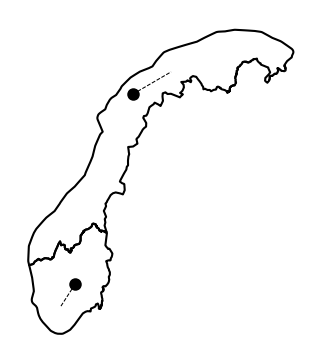

In [11]:
fig, ax = plt.subplots(figsize=(7.5*cm, 7.5*cm))
norway.dissolve(by="Region").plot(facecolor="none", ax=ax)
#norway.plot(ax=ax, color="none", edgecolor="grey", linewidth=0.45, ls="dashed")
#norway.dissolve(by="Region").plot(color="none", edgecolor="black", linewidth=0.5, ax=ax)
ax.set_yticklabels([f"{label:2.0f}$^\circ$N" for label in ax.get_yticks()]);
ax.set_xticklabels([f"{label:2.0f}$^\circ$E" for label in ax.get_xticks()]);
# ax.annotate("NO-S", xy=(0.185, 0.13), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");
# ax.annotate("NO-N", xy=(0.65, 0.85), xycoords="axes fraction", ha="center", bbox=dict(boxstyle="round",fc="0.8",alpha=0.8),va="center");

ax.set_axis_off()

# Add nodes to map, one for each region.

ax.plot(9, 60, marker="o", color="black", markersize=5, zorder=10)
ax.plot(15, 68.5, marker="o", color="black", markersize=5, zorder=10)
# Connect nodes with lines outside.
# NO-N
ax.plot([15, 19], [68.5,69.5], color="black", linewidth=0.5, zorder=10, ls = "dashed")
# NO-S
ax.plot([7.5, 9], [59,60], color="black", linewidth=0.5, zorder=10, ls = "dashed")
plt.savefig("figures/paper_plots/scen_stor.png", bbox_inches="tight", transparent=True)


#fig.savefig("figures/map.pdf", bbox_inches="tight")